In [191]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
train = pd.read_csv("train[1].csv")
train.head()

Saving train[1].csv to train[1] (5).csv


,datetime,total
0,01.01.2005 00:00:00,NaN
1,01.01.2005 01:00:00,154139.8084
2,01.01.2005 02:00:00,157818.3593
3,01.01.2005 03:00:00,149310.6991
4,01.01.2005 04:00:00,138282.0380


In [192]:
train.info(memory_usage='deep') 
train['datetime'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35064 non-null  object 
 1   total     34946 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.8 MB


array(['01.01.2005 00:00:00', '01.01.2005 01:00:00',
       '01.01.2005 02:00:00', ..., '31.12.2008 21:00:00',
       '31.12.2008 22:00:00', '31.12.2008 23:00:00'], dtype=object)

In [193]:
train['total']=train['total'].fillna(method='ffill')
train['total']=train['total'].fillna(train['total'].mean())

In [194]:
import re
for index, row in train.iterrows():
  train.loc[index, 'day']= str(re.findall(r'^..', train.loc[index, 'datetime']))
  train.loc[index, 'month']=str(re.findall(r'[.][0-1][1-9][.]', train.loc[index, 'datetime']))
  train.loc[index, 'year']=str(re.findall(r'.... ', train.loc[index, 'datetime']))
  train.loc[index, 'time']=str(re.findall(r' ........', train.loc[index, 'datetime']))
train

,datetime,total,day,month,year,time
0,01.01.2005 00:00:00,185144.454732,['01'],['.01.'],['2005 '],[' 00:00:00']
1,01.01.2005 01:00:00,154139.808400,['01'],['.01.'],['2005 '],[' 01:00:00']
2,01.01.2005 02:00:00,157818.359300,['01'],['.01.'],['2005 '],[' 02:00:00']
3,01.01.2005 03:00:00,149310.699100,['01'],['.01.'],['2005 '],[' 03:00:00']
4,01.01.2005 04:00:00,138282.038000,['01'],['.01.'],['2005 '],[' 04:00:00']
...,...,...,...,...,...,...
35059,31.12.2008 19:00:00,249376.360800,['31'],['.12.'],['2008 '],[' 19:00:00']
35060,31.12.2008 20:00:00,246510.572500,['31'],['.12.'],['2008 '],[' 20:00:00']
35061,31.12.2008 21:00:00,226469.413300,['31'],['.12.'],['2008 '],[' 21:00:00']
35062,31.12.2008 22:00:00,199907.394200,['31'],['.12.'],['2008 '],[' 22:00:00']


In [195]:
train=train.drop(['datetime'],axis=1)

In [196]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(train['day'])
label

array([ 0,  0,  0, ..., 30, 30, 30])

In [198]:
train.drop("day", axis=1, inplace=True)
train["day"] = label

In [199]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(train['month'])
label

array([ 0,  0,  0, ..., 10, 10, 10])

In [200]:
train.drop("month", axis=1, inplace=True)
train["month"] = label

In [201]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(train['year'])
label

array([0, 0, 0, ..., 3, 3, 3])

In [202]:
train.drop("year", axis=1, inplace=True)
train["year"] = label

In [203]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(train['time'])
label

array([ 0,  1,  2, ..., 21, 22, 23])

In [204]:
train.drop("time", axis=1, inplace=True)
train["time"] = label

In [205]:
train['total'].unique()

array([185144.45473237, 154139.8084    , 157818.3593    , ...,
       226469.4133    , 199907.3942    , 151086.2414    ])

In [206]:
train['total']=pd.to_numeric(train['total'])
train['total']=round(train['total'])
train

,total,day,month,year,time
0,185144.0,0,0,0,0
1,154140.0,0,0,0,1
2,157818.0,0,0,0,2
3,149311.0,0,0,0,3
4,138282.0,0,0,0,4
...,...,...,...,...,...
35059,249376.0,30,10,3,19
35060,246511.0,30,10,3,20
35061,226469.0,30,10,3,21
35062,199907.0,30,10,3,22


In [207]:
X = train.drop(['total'], axis = 1)
y = train['total']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_st = scaler.fit_transform(X)

X_st

array([[-1.67380491, -1.60078063, -1.34219223, -1.66132477],
       [-1.67380491, -1.60078063, -1.34219223, -1.51686175],
       [-1.67380491, -1.60078063, -1.34219223, -1.37239873],
       ...,
       [ 1.73525035,  1.29620995,  1.34035613,  1.37239873],
       [ 1.73525035,  1.29620995,  1.34035613,  1.51686175],
       [ 1.73525035,  1.29620995,  1.34035613,  1.66132477]])

In [208]:
X = train[['day', 'month', 'year', 'time']].values

y = train['total'].values

In [209]:
features = pd.Series(['day', 'month', 'year', 'time'])
features

0      day
1    month
2     year
3     time
dtype: object

In [210]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
# Применим линейную регрессию к нашему набору данных 
slr.fit(X, y)
# так как у нас много признаков, а не один как в предыдушем примере,
# то у нас будет много разных коэффицентов для каждого признака
# сохраним их все в датафрейм
coeff_df = pd.DataFrame(slr.coef_, columns=['Coefficient'])  
coeff_df['features'] = features

coeff_df

,Coefficient,features
0,84.836221,day
1,-758.721302,month
2,-8055.230927,year
3,4433.629308,time


In [223]:
slr.intercept_

183967.83974565298

In [230]:
X = train[['time']].values
y = train['total'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)

Slope:  [4433.6293075]
Intercept: 134157.71699064568


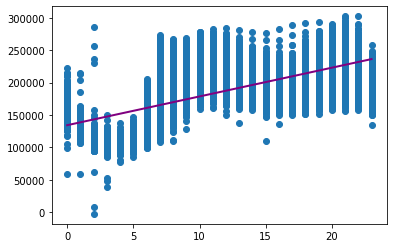

In [231]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='purple', linewidth=2)

In [232]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MSE: {:.3f}'.format(mean_squared_error(y, y_pred)))

MSE: 1130605527.230


In [268]:
from google.colab import files
uploaded = files.upload()

Saving sample.csv to sample (3).csv


In [269]:
sample = pd.read_csv("sample.csv")
sample.head()

,datetime,total
0,01.01.2009 00:00:00,0
1,01.01.2009 01:00:00,0
2,01.01.2009 02:00:00,0
3,01.01.2009 03:00:00,0
4,01.01.2009 04:00:00,0


In [270]:
sample.info() 
sample['total'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  4344 non-null   object
 1   total     4344 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.0+ KB


array([0])

In [271]:
import re
for index, row in sample.iterrows():
  sample.loc[index, 'day']= str(re.findall(r'^..', sample.loc[index, 'datetime']))
  sample.loc[index, 'month']=str(re.findall(r'[.][0-1][1-9][.]', sample.loc[index, 'datetime']))
  sample.loc[index, 'year']=str(re.findall(r'.... ', sample.loc[index, 'datetime']))
  sample.loc[index, 'time']=str(re.findall(r' ........', sample.loc[index, 'datetime']))
sample

,datetime,total,day,month,year,time
0,01.01.2009 00:00:00,0,['01'],['.01.'],['2009 '],[' 00:00:00']
1,01.01.2009 01:00:00,0,['01'],['.01.'],['2009 '],[' 01:00:00']
2,01.01.2009 02:00:00,0,['01'],['.01.'],['2009 '],[' 02:00:00']
3,01.01.2009 03:00:00,0,['01'],['.01.'],['2009 '],[' 03:00:00']
4,01.01.2009 04:00:00,0,['01'],['.01.'],['2009 '],[' 04:00:00']
...,...,...,...,...,...,...
4339,30.06.2009 19:00:00,0,['30'],['.06.'],['2009 '],[' 19:00:00']
4340,30.06.2009 20:00:00,0,['30'],['.06.'],['2009 '],[' 20:00:00']
4341,30.06.2009 21:00:00,0,['30'],['.06.'],['2009 '],[' 21:00:00']
4342,30.06.2009 22:00:00,0,['30'],['.06.'],['2009 '],[' 22:00:00']


In [272]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(sample['day'])
label

array([ 0,  0,  0, ..., 29, 29, 29])

In [273]:
sample.drop("day", axis=1, inplace=True)
sample["day"] = label

In [274]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(sample['month'])
label

array([0, 0, 0, ..., 5, 5, 5])

In [275]:
sample.drop("month", axis=1, inplace=True)
sample["month"] = label

In [276]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(sample['year'])
label

array([0, 0, 0, ..., 0, 0, 0])

In [277]:
sample.drop("year", axis=1, inplace=True)
sample["year"] = label

In [278]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(sample['time'])
label

array([ 0,  1,  2, ..., 21, 22, 23])

In [279]:
sample.drop("time", axis=1, inplace=True)
sample["time"] = label

In [280]:
X = sample.drop(['total','datetime'], axis = 1)
y = train['total']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_st = scaler.fit_transform(X)

X_st

array([[-1.67162811, -1.46686867,  0.        , -1.66132477],
       [-1.67162811, -1.46686867,  0.        , -1.51686175],
       [-1.67162811, -1.46686867,  0.        , -1.37239873],
       ...,
       [ 1.64822659,  1.4571757 ,  0.        ,  1.37239873],
       [ 1.64822659,  1.4571757 ,  0.        ,  1.51686175],
       [ 1.64822659,  1.4571757 ,  0.        ,  1.66132477]])

In [281]:
X = sample[['day', 'month', 'year', 'time']].values

y = train['total'].values

In [282]:
features = pd.Series(['day', 'month', 'year', 'time'])
features

0      day
1    month
2     year
3     time
dtype: object

In [283]:

y_pred = slr.predict(X)
sample['total']=y_pred
sample

,datetime,total,day,month,year,time
0,01.01.2009 00:00:00,0.0,0,0,0,0
1,01.01.2009 01:00:00,0.0,0,0,0,1
2,01.01.2009 02:00:00,0.0,0,0,0,2
3,01.01.2009 03:00:00,0.0,0,0,0,3
4,01.01.2009 04:00:00,0.0,0,0,0,4
...,...,...,...,...,...,...
4339,30.06.2009 19:00:00,0.0,29,5,0,19
4340,30.06.2009 20:00:00,0.0,29,5,0,20
4341,30.06.2009 21:00:00,0.0,29,5,0,21
4342,30.06.2009 22:00:00,0.0,29,5,0,22


In [284]:
sample=sample.drop(['day', 'month','year','time'],axis=1)
sample

,datetime,total
0,01.01.2009 00:00:00,0.0
1,01.01.2009 01:00:00,0.0
2,01.01.2009 02:00:00,0.0
3,01.01.2009 03:00:00,0.0
4,01.01.2009 04:00:00,0.0
...,...,...
4339,30.06.2009 19:00:00,0.0
4340,30.06.2009 20:00:00,0.0
4341,30.06.2009 21:00:00,0.0
4342,30.06.2009 22:00:00,0.0


In [285]:
sample.to_csv('Result_final.csv',index=False)
files.download("Result_final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>